<a href="https://colab.research.google.com/github/RazanHL/GRIP_The_Sparks_Foundation_tasks/blob/main/Task6_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIP - The Sparks Foundation**
### Prediction Using Decision Tree Algorithm
### *Author: Razan Hallak*





<img src=https://internship.thesparksfoundation.info/assests/img/logo.png alt='TSF' width=200 hight=200>

## **Objective:**
* Create the Decision Tree classifier and visualize it graphically.

* The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

* Dataset : https://bit.ly/3kXTdox

# **Importing Requierments**



In [1]:
import numpy as np
import pandas as pd

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [28]:
from sklearn import tree
import graphviz

# **Loading Dataset**

*   Checking for NA values
*   Splitting dataset into train / test

In [3]:
data = pd.read_csv('/content/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
# Split the data into X and y data sets
X = data[data.columns[1:-1]]
y = data.Species

In [17]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Modelling**

In [16]:
# Identifying Decision Tree model
id3 =DecisionTreeClassifier()

In [18]:
model = id3.fit(X_train, y_train)

In [19]:
predictions = model.predict(X_test)

# **Evaluating Model**

In [24]:
cm = confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))
print("Accuracy Score: {}".format(accuracy_score(y_test, predictions)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Accuracy Score: 1.0


Text(0.5, 23.52222222222222, 'Predicted Values')

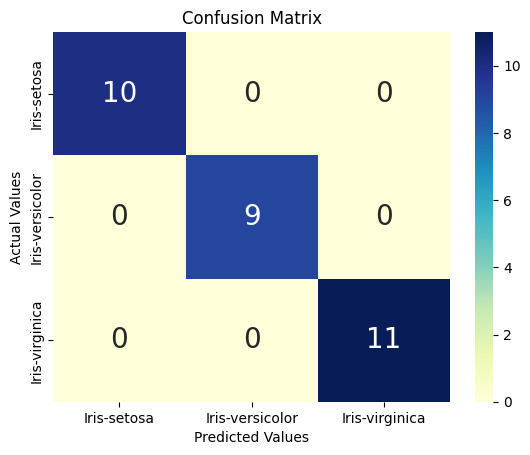

In [27]:
sns.heatmap(cm, xticklabels=data.Species.unique(),
                yticklabels=data.Species.unique(), annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

# **Visalizing Tree**

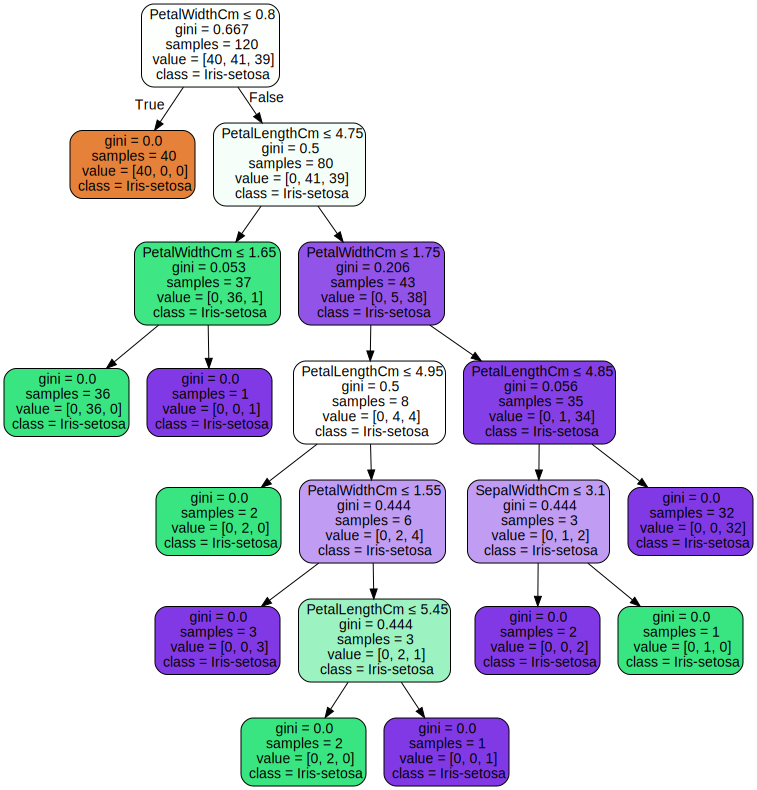

In [31]:
# Visualize the decision tree
dot_data = tree.export_graphviz(model, out_file=None,
                     feature_names=data.columns[1:-1],
                     class_names=data.Species,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree")

# Display the decision tree
graph